In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## Pressure in mH20

In [29]:
Vatnsendi_nedri_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-ÞS212.xlsx')
Vatnsendi_nedri_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_pressure['start_time'] = pd.to_datetime(Vatnsendi_nedri_pressure['start_time'], errors='coerce')
Vatnsendi_nedri_pressure.set_index('start_time',inplace=True)
Vatnsendi_nedri_pressure = Vatnsendi_nedri_pressure.sort_index(ascending=True)

Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure.loc['2024']
Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure_2024.copy()
Vatnsendi_nedri_pressure_2024.rename(columns={"value":"mH20"},inplace=True)
Vatnsendi_nedri_pressure_2024["mH20"] = Vatnsendi_nedri_pressure_2024['mH20']* 10.197
Vatnsendi_nedri_pressure_2024.head()

# Þetta er rétt 

,mH20
start_time,
2024-01-01 01:00:00,91.773
2024-01-01 02:00:00,91.773
2024-01-01 03:00:00,91.773
2024-01-01 04:00:00,91.773
2024-01-01 05:00:00,91.773


## Flow in lps

In [30]:
Vatnsendi_nedri_flow = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-RS212.xlsx')
Vatnsendi_nedri_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_flow['start_time'] = pd.to_datetime(Vatnsendi_nedri_flow['start_time'], errors='coerce')
Vatnsendi_nedri_flow.set_index('start_time',inplace=True)
Vatnsendi_nedri_flow = Vatnsendi_nedri_flow.sort_index(ascending=True)
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow.loc['2024']
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow_2024.copy()    
Vatnsendi_nedri_flow_2024.rename(columns={'value': 'Flæði [l/s]'}, inplace=True)
Vatnsendi_nedri_flow_2024['Flæði [l/s]'] = Vatnsendi_nedri_flow_2024['Flæði [l/s]']
Vatnsendi_nedri_flow_2024.head()

,Flæði [l/s]
start_time,
2024-01-01 01:00:00,33.12
2024-01-01 02:00:00,33.02
2024-01-01 03:00:00,32.77
2024-01-01 04:00:00,32.11
2024-01-01 05:00:00,31.47


## Energy consumption in pump

In [31]:
df_pumps = pd.read_csv('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/Vatnsendi_rjupnasalir_pumppower_modfied.csv')

df_pumps = df_pumps[['mpoint_id','start_time','value']]
df_pumps['start_time'] = pd.to_datetime(df_pumps['start_time'], errors='coerce')
df_pumps.set_index('start_time', inplace=True)
df_pumps = df_pumps.sort_index(ascending=True)
df_pumps.head()

,mpoint_id,value
start_time,,
2022-01-01,H-KOP-VE-DÆ222-PS,0.000000
2022-01-01,H-KOP-RS-DÆ212-PS,28.914787
2022-01-01,H-KOP-VE-DÆ212-PS,17.676978
2022-01-01,H-KOP-VE-DÆ213-PS,5.088386
2022-01-01,H-KOP-RS-DÆ211-PS,11.380736


In [38]:
Vatnsendi_nedri_dæla = df_pumps[df_pumps['mpoint_id'] == 'H-KOP-VE-DÆ222-PS']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla.loc['2024']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla_2024.copy()
Vatnsendi_nedri_dæla_2024.drop(columns=['mpoint_id'],inplace=True)
Vatnsendi_nedri_dæla_2024.rename(columns={'value': 'kW'}, inplace=True)
# erum með tvær eins dælur 
Vatnsendi_nedri_dæla_2024['kW'] = Vatnsendi_nedri_dæla_2024['kW'] * 2
Vatnsendi_nedri_dæla_2024.head()


,kW
start_time,
2024-01-01 00:00:00,31.775549
2024-01-01 01:00:00,31.921501
2024-01-01 02:00:00,31.897471
2024-01-01 03:00:00,32.097812
2024-01-01 04:00:00,32.472833


## Theoretical power

In [46]:
df_calc_eff = pd.concat([Vatnsendi_nedri_pressure_2024,Vatnsendi_nedri_flow_2024,Vatnsendi_nedri_dæla_2024],axis=1,join='outer')
df_calc_eff['Theoretical power'] = df_calc_eff['Flæði [l/s]']*(df_calc_eff['mH20']-30)*9.81/1000
df_calc_eff.head()

,mH20,Flæði [l/s],kW,Theoretical power
start_time,,,,
2024-01-01 00:00:00,NaN,NaN,31.775549,NaN
2024-01-01 01:00:00,91.773,33.12,31.921501,20.070492
2024-01-01 02:00:00,91.773,33.02,31.897471,20.009893
2024-01-01 03:00:00,91.773,32.77,32.097812,19.858395
2024-01-01 04:00:00,91.773,32.11,32.472833,19.458439


## Pump Efficiency

In [47]:
df_calc_eff['Efficiency'] = df_calc_eff['Theoretical power']/df_calc_eff['kW']
df_calc_eff.head()

,mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,
2024-01-01 00:00:00,NaN,NaN,31.775549,NaN,NaN
2024-01-01 01:00:00,91.773,33.12,31.921501,20.070492,0.628745
2024-01-01 02:00:00,91.773,33.02,31.897471,20.009893,0.627319
2024-01-01 03:00:00,91.773,32.77,32.097812,19.858395,0.618684
2024-01-01 04:00:00,91.773,32.11,32.472833,19.458439,0.599222


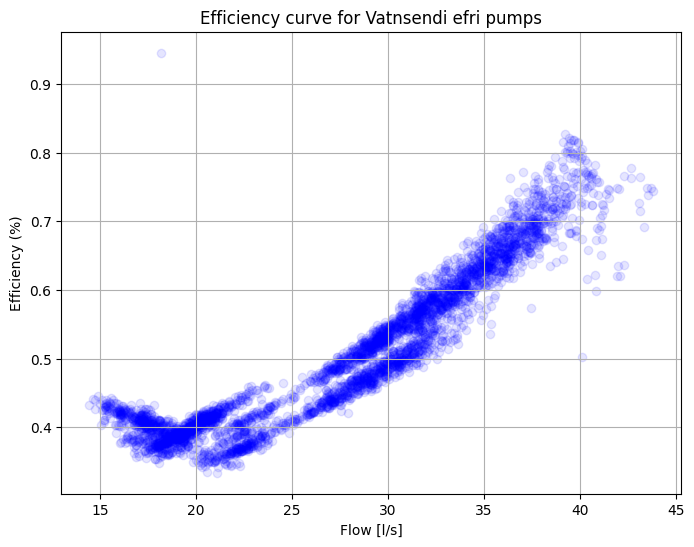

In [48]:


# Drop rows where 'Efficiency' or 'Flæði(l/s)' is NaN or zero
df_clean = df_calc_eff.dropna(subset=['Flæði [l/s]', 'Efficiency'])
df_clean = df_clean[df_clean['Efficiency'] > 0]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Efficiency'] < 1.2]  # Remove rows where Efficiency is 0


# Plot Efficiency vs Flow
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Flæði [l/s]'], df_clean['Efficiency'], marker='o', color='b',alpha = 0.1)

# Adding titles and labels
plt.title('Efficiency curve for Vatnsendi efri pumps')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.grid(True)

# Display the plot
plt.show()

In [44]:
specific_day = '2024-02-03'
filtered_data = df_calc_eff.loc[specific_day]

filtered_data

,mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,
2024-02-03 00:00:00,NaN,NaN,34.610637,NaN,NaN
2024-02-03 01:00:00,91.77300,35.38,34.652440,31.852371,0.919196
2024-02-03 02:00:00,91.77300,34.96,34.663706,31.474248,0.907989
2024-02-03 03:00:00,91.77300,34.78,34.917311,31.312195,0.896753
2024-02-03 04:00:00,91.77300,34.30,34.676246,30.880054,0.890525
2024-02-03 05:00:00,91.77300,33.87,34.168787,30.492928,0.892421
2024-02-03 06:00:00,91.77300,33.75,33.985489,30.384893,0.894055
2024-02-03 07:00:00,91.77300,33.97,34.363768,30.582958,0.889977
2024-02-03 08:00:00,91.77300,34.62,34.698432,31.168148,0.898258
